In [194]:
import numpy as np
import cv2

In [195]:
prototxt_path = '/content/colorization_deploy_v2.prototxt'
model_path = '/content/colorization_release_v2.caffemodel'
kernel_path = '/content/pts_in_hull.npy'

# img_path = '/content/dog.jfif'
# img_path = '/content/flower.jfif'
# img_path = '/content/car.jfif'
# img_path = '/content/cat.jfif'
# img_path = '/content/cat.png'
# img_path = '/content/landscape.jpg'
# img_path = '/content/khadi.jfif'
# img_path = '/content/reproductive.jpg'
# img_path = '/content/dna.jpg'        # not working
# img_path = '/content/digestive.jfif'
img_path = '/content/heart.jfif'

In [196]:
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
pts = np.load(kernel_path)                   # cluster model required for model

In [197]:
for layer in net.getLayerNames():
    print(layer)


conv1_1
relu1_1
conv1_2
relu1_2
conv1_2norm
conv2_1
relu2_1
conv2_2
relu2_2
conv2_2norm
conv3_1
relu3_1
conv3_2
relu3_2
conv3_3
relu3_3
conv3_3norm
conv4_1
relu4_1
conv4_2
relu4_2
conv4_3
relu4_3
conv4_3norm
conv5_1
relu5_1
conv5_2
relu5_2
conv5_3
relu5_3
conv5_3norm
conv6_1
relu6_1
conv6_2
relu6_2
conv6_3
relu6_3
conv6_3norm
conv7_1
relu7_1
conv7_2
relu7_2
conv7_3
relu7_3
conv7_3norm
conv8_1
relu8_1
conv8_2
relu8_2
conv8_3
relu8_3
conv8_313
conv8_313_rh
class8_313_rh
class8_ab
Silence


In [198]:
# reshape to be convolutional kernal
# LAB -> L = Lightness a* b*

pts = pts.transpose().reshape(2,313,1,1)
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts.astype('float32')]      # blobs = binary large objects??
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full([1,313], 2.606, dtype = 'float32')]


In [199]:
bw_image = cv2.imread(img_path)
normalized = bw_image.astype('float32') / 255.0
lab = cv2.cvtColor(normalized, cv2.COLOR_BGR2LAB)  # bcoz imread load in BGR format

In [200]:
# Resize image in 224 * 224

resized = cv2.resize(lab, (224,224))
L = cv2.split(resized)[0]
L -= 50

net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1,2,0))

ab = cv2.resize(ab, (bw_image.shape[1], bw_image.shape[0]))
L = cv2.split(lab)[0]    # get same lights back

In [201]:
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis = 2)
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)  # changed Color_ to COLOR_
colorized = (255.0 * colorized).astype("uint8")

# colorized = np.zeros((bw_image.shape[0], bw_image.shape[1], 3))
# colorized[:, :, 0] = L
# colorized[:, :, 1:] = ab

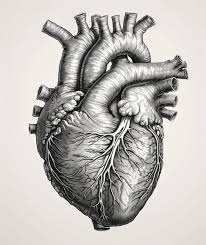

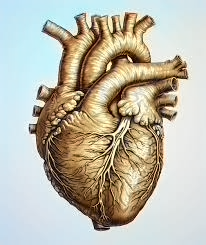

In [202]:
# Import the necessary library
from google.colab.patches import cv2_imshow

# Display the images using cv2_imshow()
cv2_imshow(bw_image)
cv2_imshow(colorized)

cv2.waitKey(0)
cv2.destroyAllWindows()